In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data=pd.read_csv('/content/train.csv')

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [42]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
for i in ['PassengerId','Name','Ticket','Cabin']:
  data.drop(columns=i,axis=1,inplace=True)

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

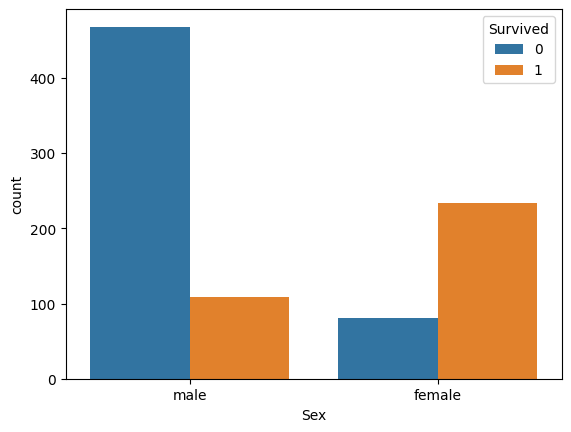

In [47]:
sns.countplot(data,x='Sex',hue="Survived")

In [48]:
data=data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

In [49]:
x=data.drop(columns='Survived',axis=1)
y=data['Survived']

In [50]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [52]:
x=ss.fit_transform(x)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [55]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_test_pred=lr.predict(x_test)

In [57]:
y_train_pred=lr.predict(x_train)

In [58]:
acc_train=accuracy_score(y_train,y_train_pred)
acc_test=accuracy_score(y_test,y_test_pred)

In [59]:
acc_train,acc_test

(0.7963483146067416, 0.8044692737430168)

In [60]:
def titanic_survival_prediction(x):
  input=np.asarray(x)
  input.reshape(-1,1)
  input=ss.transform(input)
  y_pred=lr.predict(input)
  return y_pred

In [61]:
input=([[3,0,22.000000,1,0,7.2500,0]])
v=titanic_survival_prediction(input)
if(v[0]==0):
  print("not survived")
else:
  print('survived')


not survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
